In [82]:
from limits import LimitFigure, ara_energies, ara_available, ara_projected
import importlib
import limits
importlib.reload(limits)


<module 'limits' from '/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/limits.py'>

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2ae4d860f2b0> has a label of '_line0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2ae4d852cc18> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


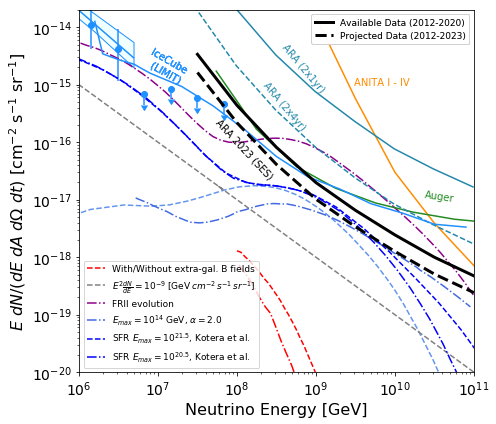

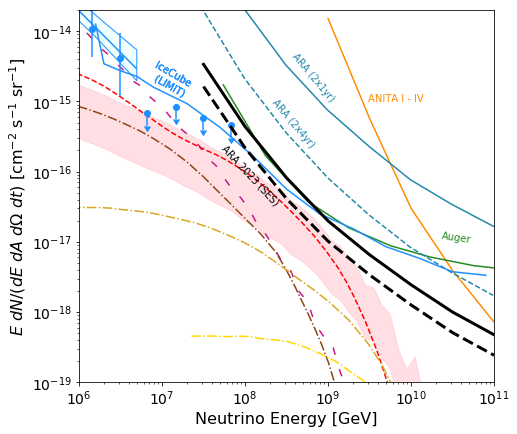

In [87]:
figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-20, 2e-14), font_size=16, tick_size=14)
# figure.build_base_plot('ara',models = ['ahlers_1','ahlers_100','batista','batista_low_z','van_vliet2019', 'van_vliet2019_Elow', 'wittkowski_off','wittkowski','van_vliet2019_hard','van_vliet2019_soft','diagonal','kotera_FRII','vanvliet19_highE_hard','kotera'])
figure.build_base_plot('ara',models = ['ahlers_100', 'wittkowski_off','wittkowski','diagonal','kotera_FRII','vanvliet19_highE_hard','kotera'])
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle=None,
                label='Available Data (2012-2020)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='--',
                label='Projected Data (2012-2023)')
figure.show(legend_size=9, save_name='e1_sensitivity_plot_ara2019.pdf')

figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-19, 2e-14), font_size=16, tick_size=14)
figure.build_base_plot('ara_src')
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle=None,
                label='Available Data (2012-2020)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='--',
                label='Projected Data (2012-2023)')
# figure.title("Trigger Level Sensitivities")
# figure.show(legend_size=8, save_name='e1_source_plot_ara2019.pdf')

  # Neutrinos per year  

In [ ]:
import neutrino_plots
from limits import (LimitFigure, count_neutrinos, ara_energies,
                    ara_100m, ara_200m, ara_200mpa)

fluxes = {
        "SFR $E_{max}=10^{21.5}$, Kotera et al.": neutrino_plots.kotera_high_e_flux,
        "SFR $E_{max}=10^{20.5}$, Kotera et al.": neutrino_plots.kotera_sfr_flux,
        "IceCube $E^{-2.19}$ Extrapolated": lambda e: LimitFigure._i3_nu_fit(e, slope=-2.19, offset=1.01),
        "100% protons, Ahlers & Halzen": neutrino_plots.ahlers_100_flux,
        "10% protons, Ahlers & Halzen": neutrino_plots.ahlers_10_flux,
        "1% protons, Ahlers & Halzen": neutrino_plots.ahlers_1_flux,
    }

styles = {
    "SFR $E_{max}=10^{21.5}$, Kotera et al.": "deeppink.--",
    "SFR $E_{max}=10^{20.5}$, Kotera et al.": "darkmagenta.--",
    "IceCube $E^{-2.19}$ Extrapolated": "dodgerblue.-",
    "100% protons, Ahlers & Halzen": "mediumblue.-.",
    "10% protons, Ahlers & Halzen": "royalblue.-.",
    "1% protons, Ahlers & Halzen": "cornflowerblue.-.",
}

ara_by_year = [284*ara_100m/366, (217+233)*ara_200m/365, (124*ara_100m+(313+304)*ara_200m)/365,
               (345+250)*ara_200m/365, (127*ara_100m+(323+297)*ara_200m)/366, 137*ara_200m/365,
               (316*ara_100m+(303+316+313)*ara_200m+186*ara_200mpa)/365,
               ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa,ara_100m+3*ara_200m+ara_200mpa]

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"],
                           save_name='yearly_neutrinos_ara_fluxes_2019proposal.pdf',xlim=[2012,2023])



fluxes = {
    "AGN, Murase": neutrino_plots.murase_agn_flux,
    "GRB afterglow-late prompt, Murase": neutrino_plots.murase_grb_late_flux,
    "GRB afterglow-wind, Murase": neutrino_plots.murase_grb_wind_flux,
    "GRB afterglow-ISM, Murase": neutrino_plots.murase_grb_ism_flux,
    "Clusters, Fang & Murase": neutrino_plots.fang_cluster_flux,
}

styles = {
    "AGN, Murase": "red.--",
    "GRB afterglow-late prompt, Murase": "saddlebrown.-.",
    "GRB afterglow-wind, Murase": "goldenrod.-.",
    "GRB afterglow-ISM, Murase": "gold.-.",
    "Clusters, Fang & Murase": "mediumvioletred.&",
}

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"])#,
#                            save_name='yearly_neutrinos_ara_sources_2019proposal.pdf')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
colnames=["energy", "flux","n","b"]
witt = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/wittkowski_BFields.txt",skiprows=range(0, 7),names=colnames,sep=" ", index_col=False)
batista = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/batista18.txt",skiprows=range(0, 7),names=colnames,sep=" ", index_col=False)
ahlers = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/ahlers_1.txt",skiprows=range(0, 7),names=colnames,sep="\t", index_col=False)





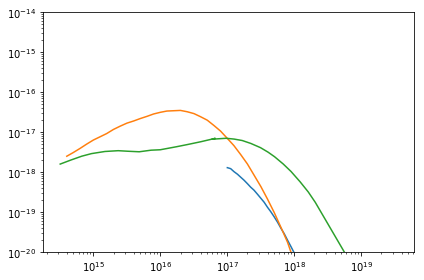

In [62]:
plt.loglog(witt["energy"], 1E9*witt["n"]/witt["energy"])
plt.loglog(batista["energy"], 1E9*batista["n"]/batista["energy"])
plt.loglog(ahlers["energy"], 1E9*ahlers["flux"]/ahlers["energy"])
plt.ylim(1E-20,1E-14)
plt.tight_layout()



In [153]:
auger_old = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/auger.txt",skiprows=range(0, 8),names=colnames,sep="\t", index_col=False)
auger_new = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/auger2019.txt",skiprows=range(0, 10),names=colnames,sep=' ', index_col=False)
icecube = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/ice_cube_ehe.txt",skiprows=range(0, 8),names=colnames,sep='\t', index_col=False)
icecube_auger = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/IceCube_from_Auger.txt",names=colnames,sep=', ', index_col=False)
icecube_paper = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/IceCube_paper.txt",names=colnames,sep=', ', index_col=False)





/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


(1e-10, 1e-05)

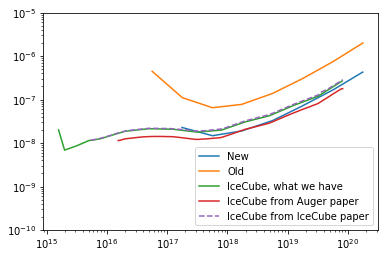

In [157]:
plt.loglog(auger_new["energy"], auger_new["n"], label = "New")
plt.loglog(auger_old["energy"], auger_old["flux"], label = "Old")
plt.loglog(icecube["energy"]*1E9, icecube["flux"], label = "IceCube, what we have")
plt.loglog(icecube_auger["energy"], icecube_auger["flux"], label = "IceCube from Auger paper")
plt.loglog(icecube_paper["energy"]*1E9, icecube_paper["flux"], "--", label = "IceCube from IceCube paper")

plt.legend()
plt.ylim(1E-10, 1E-5)

In [21]:
kotera=pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/kotera_convert.txt", names=["Energy","Flux"],sep="  ")
import numpy as np


/apps/python/3.6-conda5.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [22]:
kotera["Energy"]=1E9*10**(kotera["Energy"])

In [24]:
kotera.to_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/sensitivities/kotera_fixed.txt",index = None, header=True,sep=' ')
